In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [2]:
import pandas as pd
import seaborn as sns
s2010 = pd.read_excel("/Users/amitmishra/Library/Containers/com.microsoft.Excel/Data/Downloads/lfc squad stats.xlsx", sheet_name="Sheet1")
s2010.head()

s2010.shape

s2020 = pd.read_excel("/Users/amitmishra/Library/Containers/com.microsoft.Excel/Data/Downloads/lfc squad stats.xlsx", sheet_name="Sheet2")
s2020.head()

s2010.info()
s2020.info()

s2010.corr()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   30 non-null     object 
 1   Age      30 non-null     int64  
 2   matches  30 non-null     int64  
 3   Starts   30 non-null     int64  
 4   Min      30 non-null     int64  
 5   90s      30 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  29 non-null     object 
 1   Age     29 non-null     int64  
 2   MP      29 non-null     int64  
 3   Starts  29 non-null     int64  
 4   Min     29 non-null     int64  
 5   90s     29 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.5+ KB


,Age,matches,Starts,Min,90s
Age,1.000000,0.505217,0.488198,0.473433,0.472998
matches,0.505217,1.000000,0.935638,0.951175,0.951126
Starts,0.488198,0.935638,1.000000,0.994628,0.994571
Min,0.473433,0.951175,0.994628,1.000000,0.999997
90s,0.472998,0.951126,0.994571,0.999997,1.000000


Text(0, 0.5, 'Minutes Played in the 2010 season')

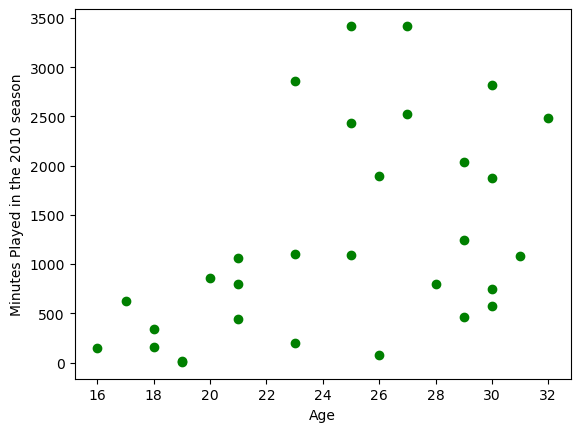

In [3]:
plt.plot(s2010.Age,s2010.Min,"go")
plt.xlabel("Age")
plt.ylabel("Minutes Played in the 2010 season")

Text(0, 0.5, 'Minutes Played in the 2020 season')

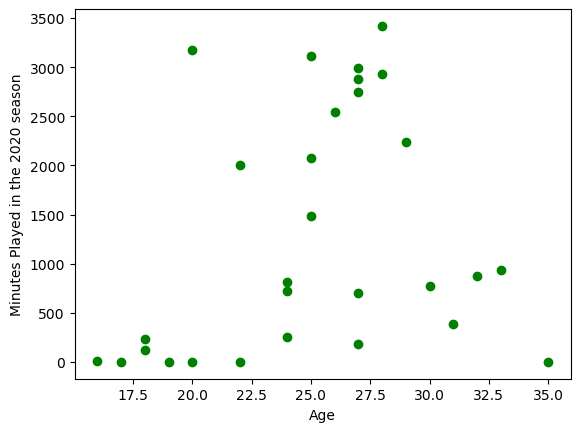

In [4]:
plt.plot(s2020.Age,s2020.Min,"go")
plt.xlabel("Age")
plt.ylabel("Minutes Played in the 2020 season")

In [5]:
'''Note: from the two seasons, 10 year apart, we can infer that the club had a clear goal and used more players in their prime in 2020 compared to 2010 when they were badly managed.'''

'Note: from the two seasons, 10 year apart, we can infer that the club had a clear goal and used more players in their prime in 2020 compared to 2010 when they were badly managed.'

In [6]:
s2010.corr()

,Age,matches,Starts,Min,90s
Age,1.000000,0.505217,0.488198,0.473433,0.472998
matches,0.505217,1.000000,0.935638,0.951175,0.951126
Starts,0.488198,0.935638,1.000000,0.994628,0.994571
Min,0.473433,0.951175,0.994628,1.000000,0.999997
90s,0.472998,0.951126,0.994571,0.999997,1.000000


In [7]:
s2010.describe()

,Age,matches,Starts,Min,90s
count,30.000000,30.000000,30.000000,30.000000,30.00000
mean,24.600000,17.033333,13.933333,1252.500000,13.91000
std,4.724113,11.448485,12.278193,1054.917639,11.72555
min,16.000000,1.000000,0.000000,6.000000,0.10000
25%,21.000000,9.250000,5.000000,448.750000,4.95000
50%,25.000000,15.000000,10.000000,962.500000,10.70000
75%,29.000000,27.250000,23.500000,1998.250000,22.20000
max,32.000000,38.000000,38.000000,3420.000000,38.00000


In [8]:
s2020.describe()

,Age,MP,Starts,Min,90s
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,25.034483,18.793103,14.413793,1296.724138,14.417241
std,4.924304,14.253770,13.975788,1229.134419,13.660660
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,6.000000,2.000000,185.000000,2.100000
50%,25.000000,18.000000,9.000000,815.000000,9.100000
75%,28.000000,30.000000,29.000000,2543.000000,28.300000
max,35.000000,38.000000,38.000000,3420.000000,38.000000


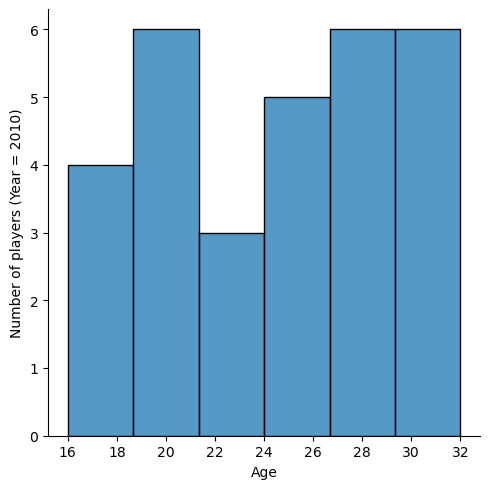

In [9]:
my2010plot = sns.displot(data = s2010.Age)
my2010plot.set_axis_labels("Age","Number of players (Year = 2010)")

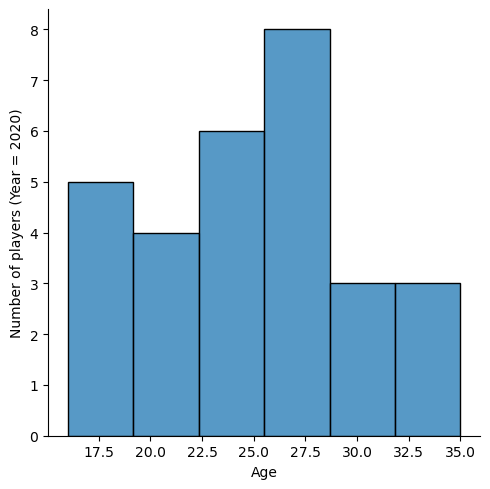

In [10]:
my2020plot = sns.displot(s2020.Age)
my2020plot.set_axis_labels("Age","Number of players (Year = 2020)")

# Performing regression

In [11]:
import statsmodels.formula.api as smf

In [12]:
model1 = smf.ols("Min~Age", data = s2020).fit()

#how to run regression; fit() is nothing but applying the linear regression on the data.

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Min'>

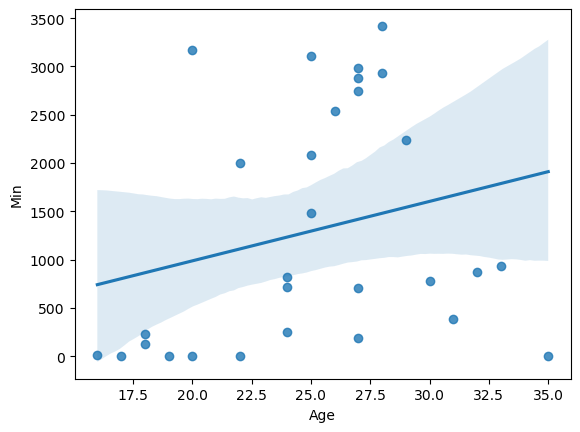

In [14]:
sns.regplot(x ="Age", y="Min", data = s2020)

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.751
Date:                Thu, 30 Mar 2023   Prob (F-statistic):              0.197
Time:                        18:59:56   Log-Likelihood:                -246.04
No. Observations:                  29   AIC:                             496.1
Df Residuals:                      27   BIC:                             498.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -245.5106   1186.938     -0.207      0.838   -2680.907    2189.886
Age           61.6044     46.551      1.323      0.197     -33.910     157.118
==============================================================================
Omnibus:                        7.464   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                2.837
Skew:                           0.440   Prob(JB):                        0.242
Kurtosis:                       1.745   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Making a prediction

In [16]:
#Taking an age input from user and predicting the expected minutes based on Liverpool's average 2020 season's stats

inputage = int(input("Enter your age: "))
if inputage < 16:
    print("You are too young to make an appearance")
elif inputage > 36:
        print("You are too old to make an appearance")

app_pred = pd.Series([inputage])
app_pred = pd.DataFrame(app_pred,columns = ['Age'])
mins_exp = model1.predict(app_pred)
print("Your expected minutes are: {}".format(mins_exp[0]))

Enter your age: 35
Your expected minutes are: 1910.644032503808


In [17]:
model1.resid_pearson

#standardised errors

array([ 1.59986677,  1.80418822,  1.20002104,  1.49748421,  1.29450369,
        1.20216818,  1.09581747,  0.9784231 ,  0.57460921,  0.64667846,
        0.73721116,  0.15697049, -0.70111934, -0.70144547, -0.34460554,
       -0.68066269, -0.58930557, -0.42539911, -1.05709842, -0.52216465,
       -0.81122963, -1.01635729, -0.60790477, -0.60361048, -0.76257039,
       -0.66099404, -0.81335856, -1.57518115, -0.91493491])

Text(0, 0.5, 'Observation number')

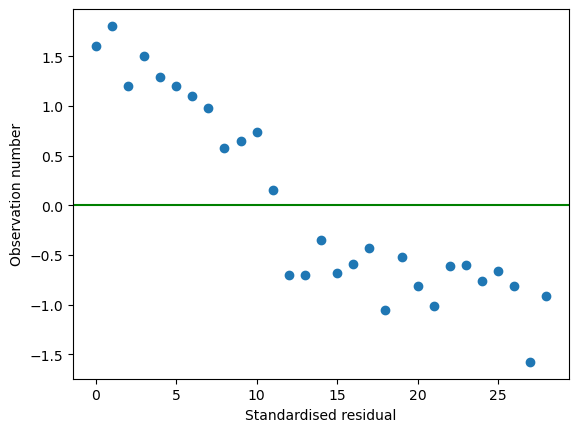

In [18]:
#plot the standardised errors

plt.plot(model1.resid_pearson, "o")
plt.axhline(y=0, c = "green")
plt.xlabel("Standardised residual")
plt.ylabel("Observation number")

(array([ 1.,  3., 10.,  3.,  0.,  1.,  3.,  2.,  3.,  3.]),
 array([-1.57518115, -1.23724421, -0.89930727, -0.56137034, -0.2234334 ,
         0.11450354,  0.45244047,  0.79037741,  1.12831435,  1.46625129,
         1.80418822]),
 <BarContainer object of 10 artists>)

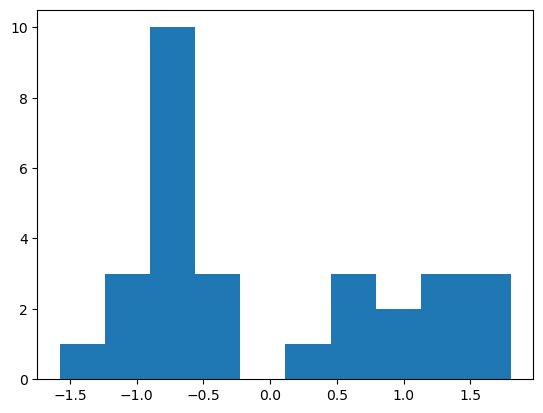

In [19]:
#can also create a histogram

plt.hist(model1.resid_pearson)

In [20]:
#performing transformation on minutes

model2 = smf.ols("np.log(Min)~Age", data = s2020).fit()

/Users/amitmishra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
s2020

,Player,Age,MP,Starts,Min,90s
0,Virgil van Dijk,28,38,38,3420,38.0
1,Trent Alexander-Arnold,20,38,35,3175,35.3
2,Georginio Wijnaldum,28,37,35,2935,32.6
3,Andrew Robertson,25,36,34,3111,34.6
4,Roberto Firmino,27,38,34,2988,33.2
5,Mohamed Salah,27,34,33,2876,32.0
6,Sadio Mané,27,35,31,2747,30.5
7,Alisson,26,29,29,2543,28.3
8,Jordan Henderson,29,30,26,2238,24.9
9,Fabinho,25,28,22,2079,23.1


In [22]:
from scipy.stats import pearsonr
pearsonr(s2020["Age"],s2020["Min"])

PearsonRResult(statistic=0.24680691609539662, pvalue=0.19680474696566586)

In [23]:
from scipy.stats import spearmanr
spearmanr(s2020["Age"],s2020["Min"])

SpearmanrResult(correlation=0.3686171652943439, pvalue=0.04910705795039402)

Text(0, 0.5, 'Minutes Played')

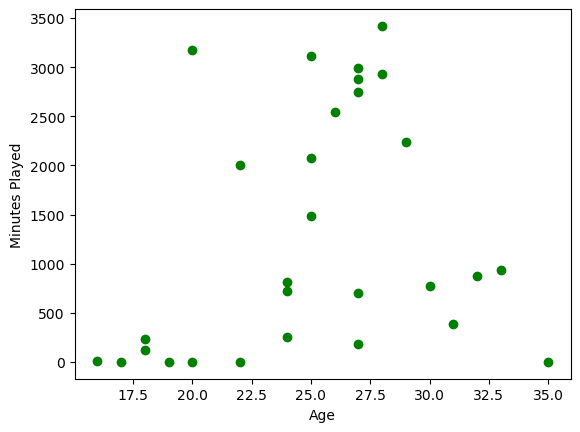

In [24]:
plt.scatter(s2020["Age"],s2020["Min"], c = "green")
plt.xlabel("Age")
plt.ylabel("Minutes Played")

###Identifying the most influencial points or outliers in the data

In [25]:
influ = model1.get_influence()
influ

In [26]:
(model1_cooks,areg) = influ.cooks_distance
max_dist = np.max(model1_cooks)
max_distarg = np.argmax(model1_cooks)
print("The max Cook's distance is: {} and the index is: {}".format(max_dist,max_distarg))

#Finding the index of the data point with the maximum Cook's distance and the value of the maximum Cook's distance

The max Cook's distance is: 0.3341043547977012 and the index is: 27


<StemContainer object of 3 artists>

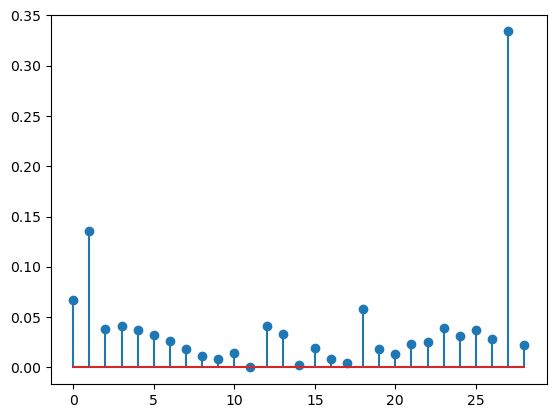

In [27]:
plt.stem(np.arange(len(s2020)),np.round(model1_cooks,3))

In [28]:
#Removing the outlier/value with the max cook's distance and influence

In [29]:
s2020_new = s2020.drop(27)

In [30]:
s2020_new

,Player,Age,MP,Starts,Min,90s
0,Virgil van Dijk,28,38,38,3420,38.0
1,Trent Alexander-Arnold,20,38,35,3175,35.3
2,Georginio Wijnaldum,28,37,35,2935,32.6
3,Andrew Robertson,25,36,34,3111,34.6
4,Roberto Firmino,27,38,34,2988,33.2
5,Mohamed Salah,27,34,33,2876,32.0
6,Sadio Mané,27,35,31,2747,30.5
7,Alisson,26,29,29,2543,28.3
8,Jordan Henderson,29,30,26,2238,24.9
9,Fabinho,25,28,22,2079,23.1


In [31]:
model3 = smf.ols("Min~Age",data  = s2020_new).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     3.901
Date:                Thu, 30 Mar 2023   Prob (F-statistic):             0.0590
Time:                        19:00:01   Log-Likelihood:                -236.38
No. Observations:                  28   AIC:                             476.8
Df Residuals:                      26   BIC:                             479.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1022.0392   1217.565     -0.839      0.409   -3524.781    1480.702
Age           95.8352     48.524      1.975      0.059      -3.908     195.578
==============================================================================
Omnibus:                        6.339   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                2.650
Skew:                           0.445   Prob(JB):                        0.266
Kurtosis:                       1.784   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
np.corrcoef(s2020_new["Age"],s2020_new.Min)

array([[1.        , 0.36118296],
       [0.36118296, 1.        ]])

In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.751
Date:                Thu, 30 Mar 2023   Prob (F-statistic):              0.197
Time:                        19:00:01   Log-Likelihood:                -246.04
No. Observations:                  29   AIC:                             496.1
Df Residuals:                      27   BIC:                             498.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -245.5106   1186.938     -0.207      0.838   -2680.907    2189.886
Age           61.6044     46.551      1.323      0.197     -33.910     157.118
==============================================================================
Omnibus:                        7.464   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                2.837
Skew:                           0.440   Prob(JB):                        0.242
Kurtosis:                       1.745   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
enterinput = int(input("Enter your age: "))
userinput = pd.Series(enterinput)
userinput = pd.DataFrame(userinput,columns = ["Age"])
predictedoutput = model3.predict(userinput)
print("Your expected minutes are: {}".format(predictedoutput[0]))

Enter your age: 35
Your expected minutes are: 2332.191494637654


In [35]:
enterinp = int(input("Enter your age: "))
app_pred = pd.Series([enterinp])
app_pred = pd.DataFrame(app_pred,columns = ['Age'])
mins_exp = model1.predict(app_pred)
print("Your expected minutes are: {}".format(mins_exp[0]))

Enter your age: 35
Your expected minutes are: 1910.644032503808


In [36]:
newdata = pd.read_excel("/Users/amitmishra/Downloads/lfcsquadstatsnew.xlsx")

In [37]:
model4 = smf.ols("Min~Age", data = newdata).fit()

In [38]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     6.715
Date:                Thu, 30 Mar 2023   Prob (F-statistic):             0.0157
Time:                        19:00:05   Log-Likelihood:                -205.07
No. Observations:                  27   AIC:                             414.1
Df Residuals:                      25   BIC:                             416.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -581.2025    515.864     -1.127      0.271   -1643.645     481.240
Age           50.5106     19.493      2.591      0.016      10.365      90.657
==============================================================================
Omnibus:                        3.566   Durbin-Watson:                   0.404
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                2.022
Skew:                           0.420   Prob(JB):                        0.364
Kurtosis:                       1.955   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

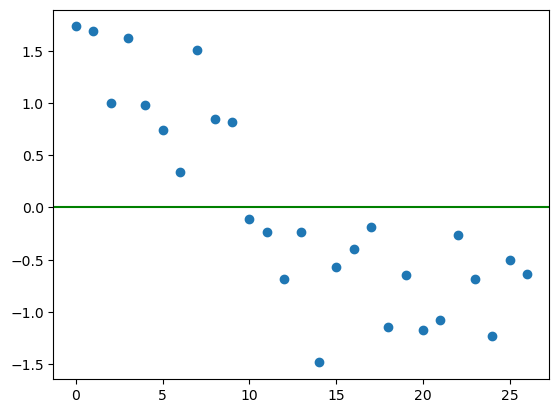

In [39]:
plt.plot(model4.resid_pearson, "o")
plt.axhline(y=0, c = "green")

In [40]:
model5 = smf.ols("Min~Age+Totdist", data = newdata).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     51.12
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           2.23e-09
Time:                        19:00:05   Log-Likelihood:                -185.87
No. Observations:                  27   AIC:                             377.7
Df Residuals:                      24   BIC:                             381.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -119.3283    263.977     -0.452      0.655    -664.151     425.494
Age            8.1906     10.917      0.750      0.460     -14.341      30.722
Totdist        0.3966      0.046      8.689      0.000       0.302       0.491
==============================================================================
Omnibus:                        8.656   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.802
Skew:                           1.017   Prob(JB):                       0.0333
Kurtosis:                       4.382   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

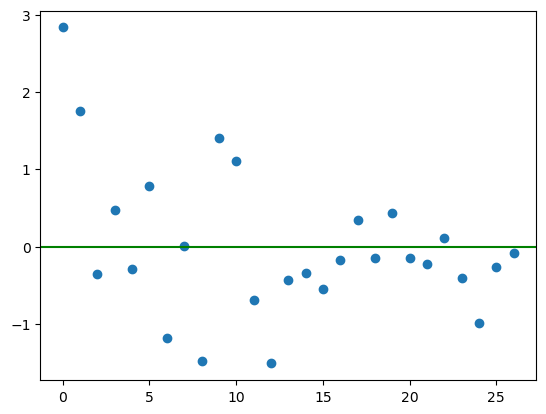

In [41]:
plt.plot(model5.resid_pearson,"o")
plt.axhline(y=0, color = "green")

In [42]:
#Checking for influences through cook's distance

In [43]:
model5_cd = model5.get_influence()
(model5_cd,areg) = model5_cd.cooks_distance
max_dist = np.max(model5_cd)
max_distarg = np.argmax(model5_cd)
print("The max Cook's distance is: {} and the index is: {}".format(max_dist,max_distarg))

The max Cook's distance is: 0.20446716679207716 and the index is: 0


In [44]:
newdata_update = newdata.drop(0)

In [45]:
newdata_update.iloc[0]

Player     Mohamed Salah
Age                   30
MP                    20
Min                 1776
Totdist             3051
PrgDist             1374
Name: 1, dtype: object

In [46]:
model6 = smf.ols("Min~Totdist",data = newdata_update).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     141.7
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           1.47e-11
Time:                        19:00:06   Log-Likelihood:                -173.83
No. Observations:                  26   AIC:                             351.7
Df Residuals:                      24   BIC:                             354.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.4068     65.647      1.027      0.315     -68.082     202.896
Totdist        0.3950      0.033     11.904      0.000       0.327       0.464
==============================================================================
Omnibus:                        3.996   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                2.449
Skew:                           0.709   Prob(JB):                        0.294
Kurtosis:                       3.499   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
enterinp = int(input("Enter total distance covered: "))
app_pred = pd.Series([enterinp])
app_pred = pd.DataFrame(app_pred,columns = ['Totdist'])
mins_exp = model6.predict(app_pred)
print("Your expected minutes are: {}".format(mins_exp[0]))

Enter total distance covered: 1000
Your expected minutes are: 462.44183958696345


# Model with quadratics to correct the issue of Linear regression

The linear regression model has some limitations as we get a straight line after OLS. This means te older the player gets, the more lileky he/she is to play. This isn't the case in real life. So we use polynomial regression to get a curve that fits the data and make better predictions.

In [48]:
newdata.head()

,Player,Age,MP,Min,Totdist,PrgDist
0,Alisson,30,20,1800,2427,1494
1,Mohamed Salah,30,20,1776,3051,1374
2,Virgil van Dijk,31,17,1485,3632,1865
3,Trent Alexander-Arnold,24,20,1441,3137,1636
4,Andrew Robertson,28,18,1322,3236,1790


In [ ]:
#creating a new column with age square values

In [49]:
newdata["Age_sq"] = newdata.Age**2

In [50]:
newdata.head()

,Player,Age,MP,Min,Totdist,PrgDist,Age_sq
0,Alisson,30,20,1800,2427,1494,900
1,Mohamed Salah,30,20,1776,3051,1374,900
2,Virgil van Dijk,31,17,1485,3632,1865,961
3,Trent Alexander-Arnold,24,20,1441,3137,1636,576
4,Andrew Robertson,28,18,1322,3236,1790,784


In [118]:
modelq1 = smf.ols("Min~Age+Age_sq", data = newdata).fit()

In [119]:
modelq1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Min   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     3.992
Date:                Thu, 30 Mar 2023   Prob (F-statistic):             0.0319
Time:                        19:58:33   Log-Likelihood:                -204.40
No. Observations:                  27   AIC:                             414.8
Df Residuals:                      24   BIC:                             418.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2957.4265   2218.321     -1.333      0.195   -7535.816    1620.962
Age          241.4735    174.510      1.384      0.179    -118.698     601.645
Age_sq        -3.6963      3.357     -1.101      0.282     -10.625       3.232
==============================================================================
Omnibus:                        2.490   Durbin-Watson:                   0.473
Prob(Omnibus):                  0.288   Jarque-Bera (JB):                1.621
Skew:                           0.367   Prob(JB):                        0.445
Kurtosis:                       2.050   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculating the turning point after which Age_sq has a negative effect on the total mins played:


In [153]:
241.27/(2*3.696)

32.63933982683983

In [132]:
inp_data = pd.DataFrame({"Age":30,"Age_sq":30**2},index = ["Mins"])

In [167]:
input_here = int(input("Enter your age: "))
inp_data = pd.DataFrame({"Age":input_here,"Age_sq":input_here**2},index = ["Expected Mins are:"])
modelq1.predict(inp_data)

Enter your age: 27


Expected Mins are:    867.722589
dtype: float64